In [ ]:
# default_exp plot

# plot
> Visualize boards and game play

In [ ]:
# hide
%load_ext nb_black
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

<IPython.core.display.Javascript object>

In [ ]:
# export
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"

<IPython.core.display.Javascript object>

# details
This is haphazard collection of plotting functions

In [ ]:
# export
def _shift(move):
    """Shift the move so it plots nice as an arrow"""
    return (move[0] + 0.5, move[1] + 0.5)

<IPython.core.display.Javascript object>

In [ ]:
# export
def plot_maze(
    maze, moves=None, plot=False, path=None, height=2, width=3, name="board.png"
):
    """Plot the maze (white is the maze bounderies)"""

    # Plot!
    fig, ax = plt.subplots(figsize=(width, height))  # Sample figsize in inches
    ax = sns.heatmap(
        maze,
        linewidths=3,
        vmin=0,
        vmax=1,
        cbar=False,
        square=True,
        cmap=["grey", "white"],
        ax=ax,
    )

    # Plot the moves?
    if moves is not None:
        last = moves[0]
        for move in moves[1:]:
            ax.annotate(
                "",
                xy=_shift(move),
                xytext=_shift(last),
                arrowprops=dict(width=1, headwidth=10, color="black"),
            )
            last = move

    # Save an image?
    if path is not None:
        plt.savefig(os.path.join(path, name))

    # Show?
    if plot:
        plt.pause(0.01)
    plt.close("all")

<IPython.core.display.Javascript object>

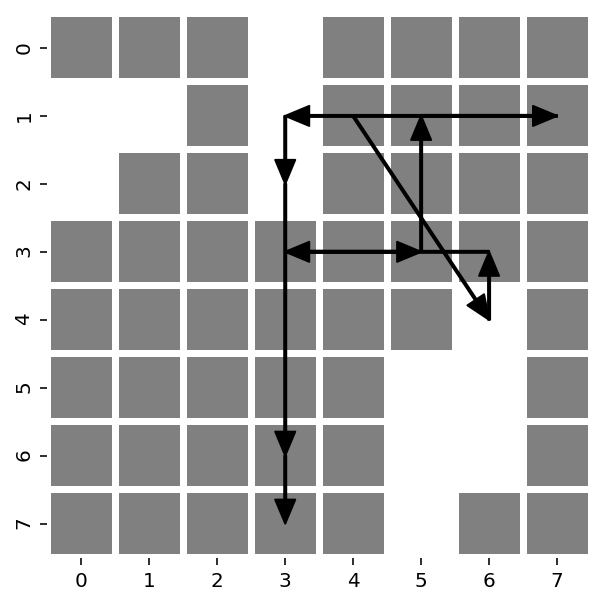

<IPython.core.display.Javascript object>

In [ ]:
# hide
from truthiness.game import create_maze
from truthiness.player import extract_moves
from truthiness.player import Curious
from truthiness.player import Random
from truthiness.player import run

(
    moves,
    mazes,
    Es,
    Qs,
) = run(8, Random(), num_episodes=2, seed=10)

selected = extract_moves(0, moves)
maze = extract_board(0, mazes)

plot_maze(maze, selected, plot=True, height=5, width=5)

In [ ]:
# export
def plot_boards(
    E,
    Q,
    moves=None,
    plot=False,
    path=None,
    height=2,
    width=3,
    name="board.png",
    **heatmap_kwargs
):
    """Plot the boards"""

    # Fix colors (overide kwargs)
    cmap = sns.diverging_palette(300, 145, s=60, as_cmap=True)

    # Plot!
    fig, ax = plt.subplots(ncols=2, figsize=(width, height))  # Sample figsize in inches
    ax[0] = sns.heatmap(
        E,
        linewidths=3,
        center=0,
        ax=ax[0],
        cmap=cmap,
        cbar=False,
        square=True,
        **heatmap_kwargs
    )
    ax[1] = sns.heatmap(
        -Q,
        linewidths=3,
        center=0,
        ax=ax[1],
        cmap=cmap,
        cbar=False,
        square=True,
        **heatmap_kwargs
    )

    ax[0].title.set_text("Information ($E$)")
    ax[1].title.set_text("Consequence ($Q$)")

    # Plot the moves?
    if moves is not None:
        # Es
        last = moves[0]
        for move in moves[1:]:
            ax[0].annotate(
                "",
                xy=_shift(move),
                xytext=_shift(last),
                arrowprops=dict(width=1, headwidth=10, color="black"),
            )
            last = move
        # Qs
        last = moves[0]
        for move in moves[1:]:
            ax[1].annotate(
                "",
                xy=_shift(move),
                xytext=_shift(last),
                arrowprops=dict(width=1, headwidth=10, color="black"),
            )
            last = move

    # Save an image?
    if path is not None:
        plt.savefig(os.path.join(path, name))

    # Show?
    if plot:
        plt.pause(0.01)
    plt.close("all")

<IPython.core.display.Javascript object>

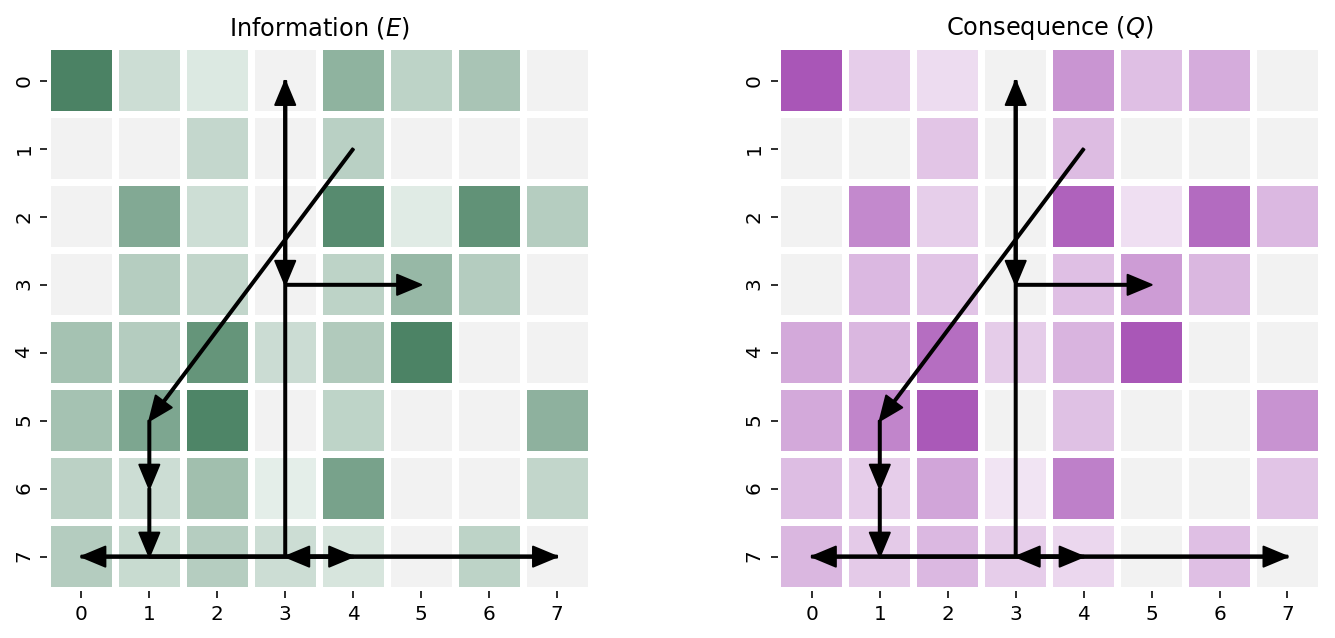

<IPython.core.display.Javascript object>

In [ ]:
# hide
from truthiness.game import create_maze
from truthiness.player import extract_moves
from truthiness.player import extract_board
from truthiness.player import Curious
from truthiness.player import Random
from truthiness.player import run

(
    moves,
    mazes,
    Es,
    Qs,
) = run(8, Random(), num_episodes=10, seed=10)

selected = extract_moves(0, moves)
E = extract_board(0, Es)
Q = extract_board(0, Qs)

plot_boards(E, Q, moves=selected, plot=True, height=5, width=12)

In [ ]:
# export
def plot_histograms(
    E, Q, plot=False, path=None, height=2, width=3, name="board.png", **hist_kwargs
):
    """Plot a histograms of a board's values."""

    # Set colors to match board
    green = [0.29233637, 0.51074656, 0.39061738, 1.0]
    violet = [0.66131564, 0.3363342, 0.71648282, 1.0]

    # Plot!
    fig, ax = plt.subplots(figsize=(width, height))  # Sample figsize in inches
    plt.hist(E.flatten(), label="$E$", color=green, **hist_kwargs)
    plt.hist(Q.flatten(), label="$Q$", color=violet, **hist_kwargs)
    plt.legend()

    # Save an image?
    if path is not None:
        plt.savefig(os.path.join(path, name))

    # Show?
    if plot:
        plt.pause(0.01)
    plt.close("all")

In [ ]:
# export
def plot_available(
    x, y, maze, available, plot=False, path=None, height=2, width=3, name="board.png"
):
    """Plot available moves.

    Params
    ------
    n : int
        Board size
    x : int
        Start x position
    y : int
        Start x position
    available : list(tuple)
        List of available moves as (x, y)
    ...
    """

    # Start
    n = maze.shape[0]
    board = np.zeros((n, n))
    board[x, y] = 1

    # Moves
    for (i, j) in available:
        board[i, j] = 2

    # Plot!
    fig, ax = plt.subplots(figsize=(width, height))  # Sample figsize in inches
    ax = sns.heatmap(
        board,
        linewidths=3,
        cbar=False,
        square=True,
        cmap=["grey", "yellow", "red"],
        ax=ax,
        mask=maze,
    )

    # Save an image?
    if path is not None:
        plt.savefig(os.path.join(path, name))

    # Show?
    if plot:
        plt.pause(0.01)
    plt.close("all")